# Plotting IOWA Mesonet Data: Regional Insights
***
This notebook will use data from the IOWA ground-based mesonet network to plot archived surface conditions (temperatures [F], dewpoint temperatures [F], relative humidity [%], pressure [mb], precipitation [in], wind speed [mph], wind direction [degrees]) recorded by ASOS stations.<br><br> *Data can be downloaded/accessed here: https://mesonet.agron.iastate.edu/request/download.phtml?network=NY_ASOS* <br>**While saving data, please choose to represent missing data with an 'M' and trace reports as '0.0001'** <br> <br>
Using this notebook, you will be able to plot data for regional analyses by using multiple stations' data to gain an average outlook on what conditions recorded as over a wider area in a particular region. **Some cells require user input, so please do not try to run all the cells at once!**

## Import all necessary packages
These are necessary for making plots, both graphically and geographically

In [1]:
# for basic plotting purposes:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# for geographic maps:
import matplotlib as mplt
from metpy.plots import USCOUNTIES
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# REGIONAL ANALYSIS
***
Here, we will be able to take multiple sites and average the data based on each variable. </s>
Things that need to be altered include: </s>
> - File path based on your file name and location
> > *A sample .txt file is used in this notebook, hence the file named "" in the following cells. If you would like to plot a different set of data, please refer to the aforementioned link to the IOWA database and save sites in the region you are interested in investigating. Then, upload the .txt file to this hub and change the below code.*
> - Map latitude and longitude values based on where your data is sourced from
> - Plot suptitles: Specifically for each general area of interest relative to station locations (e.g., Northeast PA; Northwest OR)

In [2]:
# acquire your df
df_r1 = pd.read_csv(r'C:\Users\Owner\Downloads\SEpa_asos.txt') 

# locate where missing values are located and set them = to NaN values
df_r1 = df_r1.replace('M', np.nan)

# print the column titles to check to ensure all variables are accounted for accordingly
print(df_r1.columns)

# create a datetime object for the values and make columns for time and day. these will be useful if you wish to examine hourly data or daily data
df_r1['valid'] = pd.to_datetime(df_r1['valid'])
df_r1['hour'] = df_r1['valid'].dt.hour
df_r1['day'] = df_r1['valid'].dt.day
df_r1['month'] = df_r1['valid'].dt.month
df_r1['year'] = df_r1['valid'].dt.year

Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sped', 'mslp', 'p01i'],
      dtype='object')


## Plot Locations of Stations
*You will need to change the map bounds depending on what state you are in*

In [3]:
# get station names that are used - will be useful later
stations = df_r1['station'].unique()

# need to get lon and lats of corresponding stations to plot them on the map
    # so, filter df_r1 for unique stations and keep latitude/longitude. drop duplicate lat/lon values as well
station_coords = df_r1[df_r1['station'].isin(stations)][['station', 'lat', 'lon']].drop_duplicates()

# retrieve the latitude and longitude values in lists
lats = station_coords['lat'].tolist()
lons = station_coords['lon'].tolist()

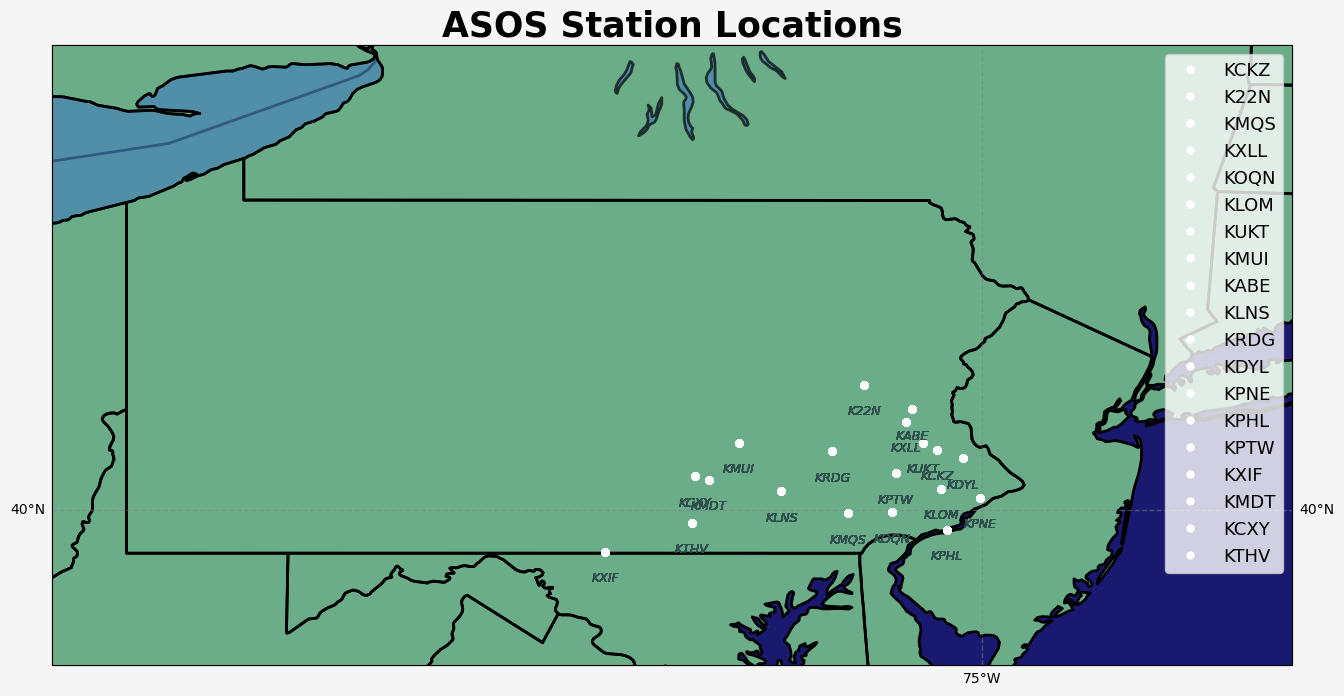

In [4]:
# plot the map - start by making the map & setting its parameters
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 15), facecolor= 'gainsboro')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-81, -73, 39, 43], crs = ccrs.PlateCarree())
fig.set_facecolor('whitesmoke')
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-125,-115,-105,-95,-85,-75,-65])
gl.ylocator = mticker.FixedLocator([20,30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='seagreen', alpha=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor = 'black', linewidth=2)
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='midnightblue', linewidth=2)
ax.add_feature(cfeature.LAKES, edgecolor = 'black', facecolor='steelblue', alpha=0.7, linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = 'black', linewidth=2)

# plot text for each site on the map
sites = df_r1['station'].unique()
for k,site in enumerate(sites):
    ax.plot(lons, lats, '.', color='white', markersize=10, linewidth=2.0, label = 'K%s' % site)
    ax.set_title('ASOS Station Locations', fontsize=25, fontweight='bold')
    for lo, la, site in zip(lons, lats, stations):
        ax.text(lo, la-0.13, 'K%s' %site, color='darkslategrey', fontfamily='sans-serif', fontstyle='italic', fontsize=9, ha='center', va='top', transform=ccrs.PlateCarree())
    ax.legend(fontsize=13)

## HOURLY ANALYSIS

In [5]:
# ask user for a month, day, and year.
month, day, year = map(int, input('What month, day, and year are you interested in (e.g., 8 1 2006): ').split())
user_date = datetime(year, month, day).date()  # convert user input to date object

# function to check if the user's date of interest is in the .txt file
def check_date(df_r1, user_date):
    # if the date is in df['valid'] column, then return that it is a valid date (True). If not, return that it is not valid (False)
    if user_date in df_r1['valid'].dt.date.values:
        return True
    return False

# check to see if the date exists & is valid for use from here on
if check_date(df_r1, user_date):
    print('That date, %s, is a valid date that was found in the .txt file.' %user_date)
else:
    print('That date, %s, is not a valid date included in the .txt file. Please check that you have downloaded the correct data and try again.' %user_date)

What month, day, and year are you interested in (e.g., 8 1 2006):  7 1 2024


That date, 2024-07-01, is a valid date that was found in the .txt file.


In [6]:
# create a new, temporary df for the specified day 
dfr = df_r1.loc[(df_r1['day'] == day) & (df_r1['month'] == month)]
dfr = dfr.copy() # need this to edit a standalone df - not the original

# now, average the data by hour
    # below 7 lines are extra steps to ensure all data is properly accounted for
dfr['p01i'] = pd.to_numeric(dfr['p01i'], errors='coerce')
dfr['drct'] = pd.to_numeric(dfr['drct'], errors='coerce')
dfr['sped'] = pd.to_numeric(dfr['sped'], errors='coerce')
dfr['mslp'] = pd.to_numeric(dfr['mslp'], errors='coerce')
dfr['tmpf'] = pd.to_numeric(dfr['tmpf'], errors='coerce')
dfr['dwpf'] = pd.to_numeric(dfr['dwpf'], errors='coerce')
dfr['relh'] = pd.to_numeric(dfr['relh'], errors='coerce')

# group the values by hour regardless of station ID
df_r2 = dfr.groupby(['hour']).mean(numeric_only=True)
df_r2.reset_index(inplace=True)
df_r2

,hour,lon,lat,tmpf,dwpf,relh,drct,sped,mslp,p01i,day,month,year
0,0,-75.685958,40.242058,76.600000,67.327273,76.560000,210.000000,6.586364,1012.550000,0.006857,1.0,7.0,2024.0
1,1,-75.680036,40.247767,74.538889,65.205556,75.296667,248.823529,7.506944,1014.009091,0.000000,1.0,7.0,2024.0
2,2,-75.662019,40.243203,73.002703,62.127027,70.586486,266.285714,8.143243,1015.316667,0.000000,1.0,7.0,2024.0
3,3,-75.692991,40.258463,70.585714,57.668571,64.664857,302.285714,8.608571,1015.425000,0.000000,1.0,7.0,2024.0
4,4,-75.712979,40.263744,67.426471,53.820588,61.915882,306.060606,8.320588,1015.333333,0.000000,1.0,7.0,2024.0
5,5,-75.727718,40.275573,65.339394,52.084848,62.315455,266.875000,6.725758,1015.533333,0.000000,1.0,7.0,2024.0
6,6,-75.727718,40.275573,63.433333,52.112121,66.802727,255.517241,6.133333,1015.741667,0.000000,1.0,7.0,2024.0
7,7,-75.727718,40.275573,62.096970,52.578788,71.463030,211.724138,5.854545,1016.200000,0.000000,1.0,7.0,2024.0
8,8,-75.727718,40.275573,61.721212,52.566667,72.342727,245.000000,6.133333,1016.858333,0.000000,1.0,7.0,2024.0
9,9,-75.752471,40.280256,62.000000,52.011765,70.023235,262.500000,6.223529,1017.408333,0.000000,1.0,7.0,2024.0


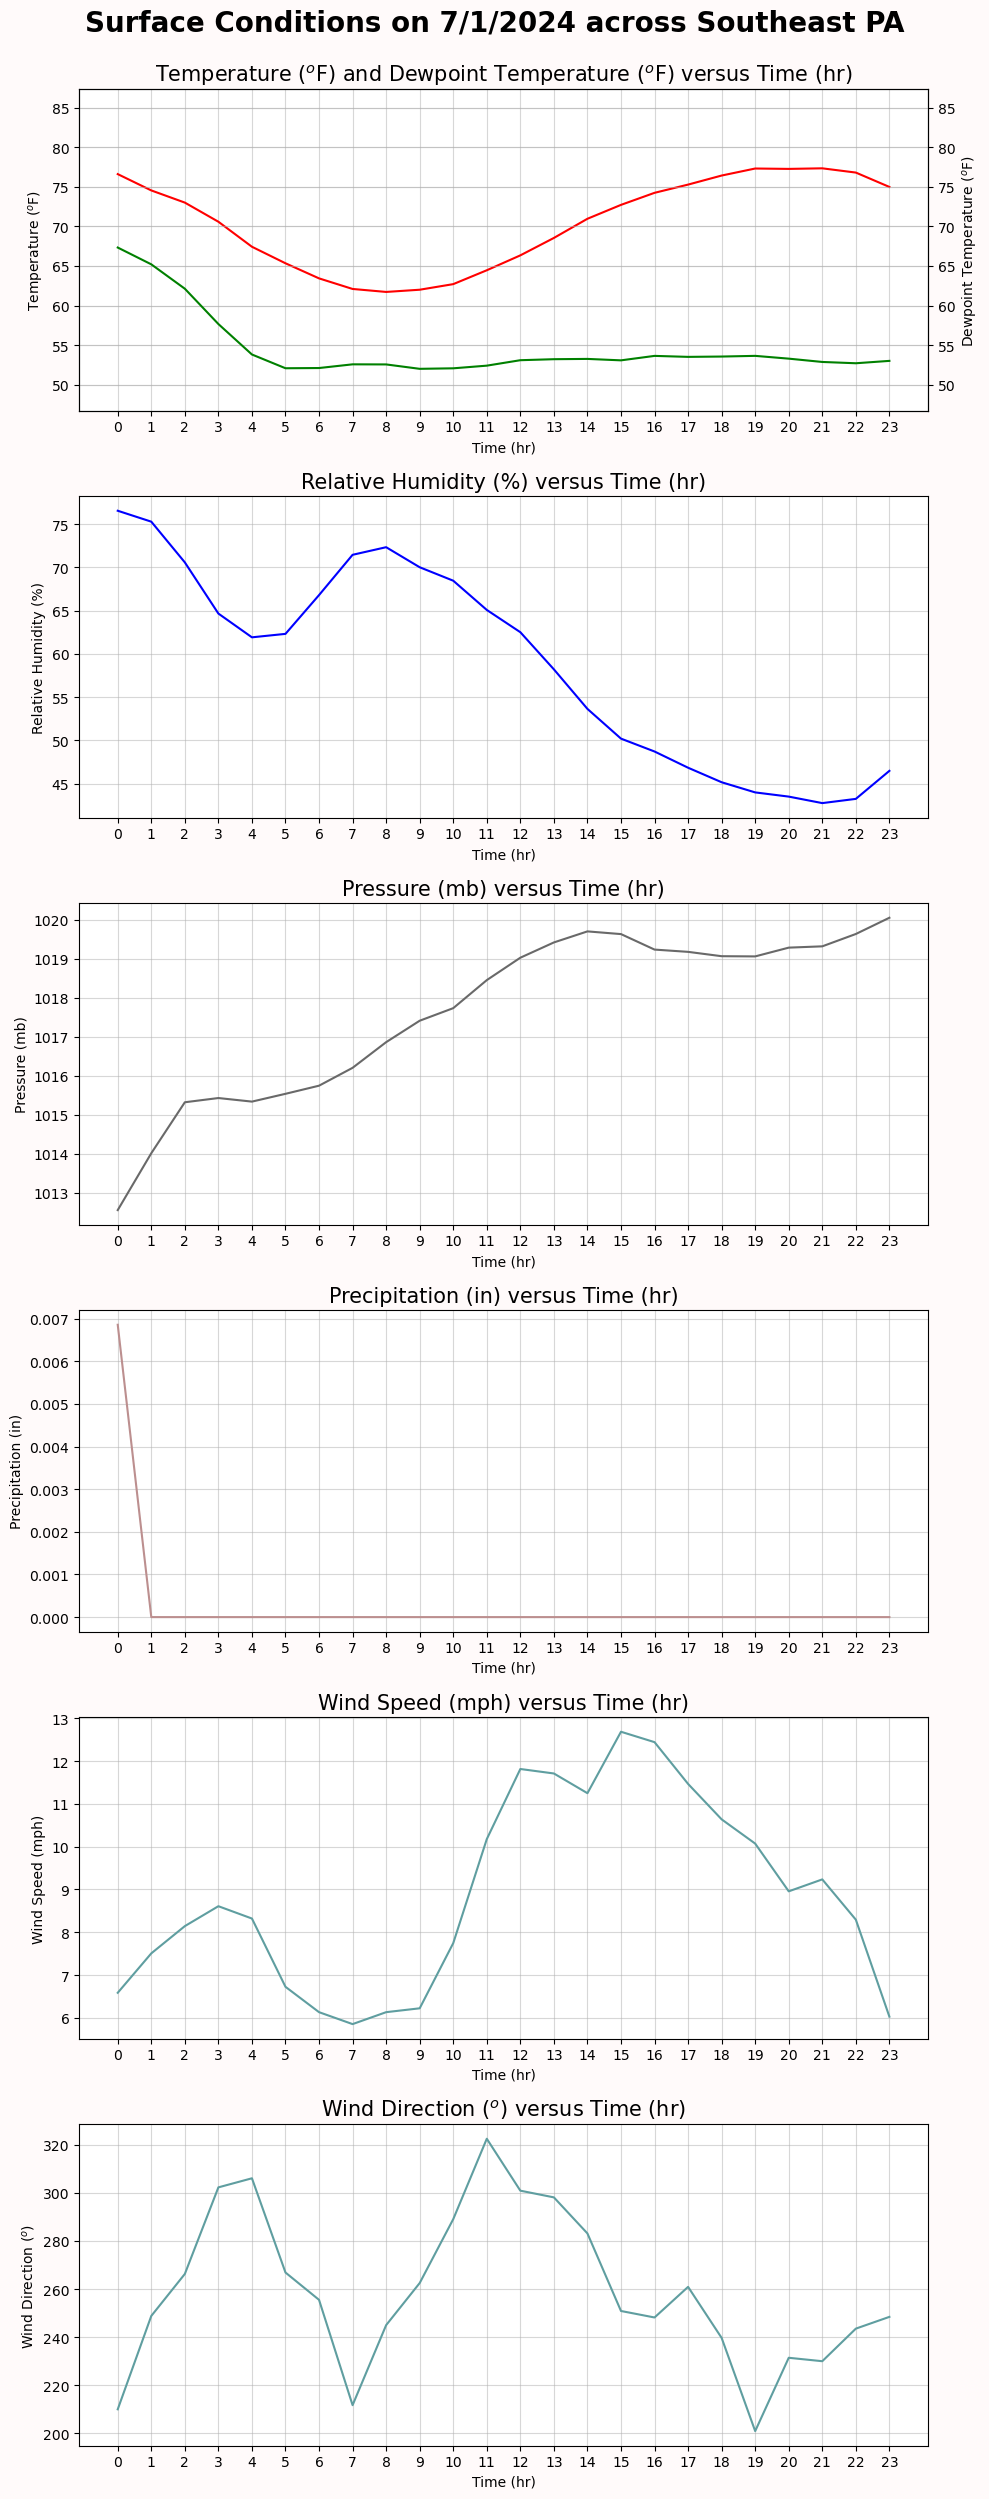

In [7]:
# plot temp, dewpoint, rh, slp, vis, precip, and wsp in one figure
fig, axs = plt.subplots(ncols = 1, nrows = 6, figsize = (10,25))
fig.set_facecolor('snow')
subplot_titles = ['Temperature ($^{o}$F) and Dewpoint Temperature ($^{o}$F)', 'Relative Humidity (%)', 'Pressure (mb)', 'Precipitation (in)', 'Wind Speed (mph)', 'Wind Direction ($^o$)']
axs = axs.flatten()

# start subplot loop
for i in range(0,6): 
    if (i == 0):      
        axs[i].plot(df_r2['hour'], df_r2['tmpf'], color='red')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Temperature ($^{o}$F)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
        axs[i].set_ylim((np.min(df_r2['tmpf'])-15), (np.max(df_r2['tmpf'])+10))
        # create twin axis to additionally include dewpoint temperatures
        j = axs[i].twinx()
        j.plot(df_r2['hour'], df_r2['dwpf'], color='green')
        j.set_ylabel('Dewpoint Temperature ($^{o}$F)', fontsize=10)
        j.grid(True, alpha=0.5)
        j.set_ylim((np.min(df_r2['tmpf'])-15), (np.max(df_r2['tmpf'])+10))
    if (i==1):
        axs[i].plot(df_r2['hour'], df_r2['relh'], color='blue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Relative Humidity (%)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
    if (i==2):
        axs[i].plot(df_r2['hour'], df_r2['mslp'], color='dimgray')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Pressure (mb)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
    if (i==3):
        axs[i].plot(df_r2['hour'], df_r2['p01i'], color='rosybrown')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Precipitation (in)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
    if (i==4):
        axs[i].plot(df_r2['hour'], df_r2['sped'], color='cadetblue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Wind Speed (mph)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
    if (i==5):
        axs[i].plot(df_r2['hour'], df_r2['drct'], color='cadetblue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (hr)', fontsize=15)
        axs[i].set_ylabel('Wind Direction ($^o$)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_r2['hour'])
        
# change the below suptitle line to specify what area is being investigated
fig.suptitle('Surface Conditions on %s/%s/%s across Southeast PA' % (month, day, year), fontsize=20, fontweight='bold', y = 0.998)  # create figure title
fig.subplots_adjust(hspace = 0.25)  # increase space between plots
plt.tight_layout()
plt.show()

## DAILY ANALYSIS

In [8]:
# ask user for a month, day, and year.
s_m, s_d, s_y = map(int, input('What start month, day, and year are you interested in (e.g., 5 1 2004): ').split())
e_m, e_d, e_y = map(int, input('What end month, day, and year are you interested in (e.g., 5 20 2004): ').split())

user_sdate = datetime(s_y, s_m, s_d).date()  # convert user input to date object
user_edate = datetime(e_y, e_m, e_d).date()  # convert user input to date object

# function to check if the user's start date of interest is in the .txt file
def check_sdate(df_r1, user_sdate):
    # if the date is in df['valid'] column, then return that it is a valid date (True). If not, return that it is not valid (False)
    if user_sdate in df_r1['valid'].dt.date.values:
        return True
    return False
# check to see if the date exists & is valid for use from here on
if check_sdate(df_r1, user_sdate):
    print('That start date, %s, is a valid date that was found in the .txt file.' %user_sdate)
else:
    print('That start date, %s, is not a valid date included in the .txt file. Please check that you have downloaded the correct data and try again.' %user_sdate)


# function to check if the user's end date of interest is in the .txt file
def check_edate(df_r1, user_edate):
    # if the date is in df['valid'] column, then return that it is a valid date (True). If not, return that it is not valid (False)
    if user_edate in df_r1['valid'].dt.date.values:
        return True
    return False
# check to see if the date exists & is valid for use from here on
if check_date(df_r1, user_edate):
    print('That end date, %s, is a valid date that was found in the .txt file.' %user_edate)
else:
    print('That end date, %s, is not a valid date included in the .txt file. Please check that you have downloaded the correct data and try again.' %user_edate)

What start month, day, and year are you interested in (e.g., 5 1 2004):  4 20 2024
What end month, day, and year are you interested in (e.g., 5 20 2004):  5 20 2024


That start date, 2024-04-20, is a valid date that was found in the .txt file.
That end date, 2024-05-20, is a valid date that was found in the .txt file.


In [9]:
# create another new, temporary df for the specified day 
df_temp2 = df_r1.copy()

    # below 7 lines are extra steps to ensure all data is properly accounted for
df_temp2['p01i'] = pd.to_numeric(df_temp2['p01i'], errors='coerce')
df_temp2['drct'] = pd.to_numeric(df_temp2['drct'], errors='coerce')
df_temp2['sped'] = pd.to_numeric(df_temp2['sped'], errors='coerce')
df_temp2['mslp'] = pd.to_numeric(df_temp2['mslp'], errors='coerce')
df_temp2['valid'] = pd.to_datetime(df_temp2['valid']).dt.date
df_temp2['tmpf'] = pd.to_numeric(df_temp2['tmpf'], errors='coerce')
df_temp2['dwpf'] = pd.to_numeric(df_temp2['dwpf'], errors='coerce')
df_temp2['relh'] = pd.to_numeric(df_temp2['relh'], errors='coerce')

# create a new df to group data according to each day of the month regardless of station ID
df_mult2 = df_temp2.groupby(['valid', 'month', 'day']).mean(numeric_only=True)
df_mult2.reset_index(inplace=True)
df_mult2

,valid,month,day,lon,lat,tmpf,dwpf,relh,drct,sped,mslp,p01i,hour,year
0,2024-01-01,1,1,-75.785946,40.296886,38.387174,33.420000,82.749543,99.480088,1.899186,1016.519195,0.000505,11.464712,2024.0
1,2024-01-02,1,2,-75.712586,40.283932,35.728797,25.788578,67.786173,288.787879,7.169684,1019.562825,0.000012,11.294046,2024.0
2,2024-01-03,1,3,-75.698703,40.287100,33.728420,25.521381,72.803187,180.096154,3.657703,1017.742678,0.000000,11.343958,2024.0
3,2024-01-04,1,4,-75.709608,40.288096,35.299868,26.395370,71.905847,161.932432,4.946825,1016.698340,0.000000,11.758256,2024.0
4,2024-01-05,1,5,-75.694764,40.286212,29.398828,15.598307,56.567891,235.390947,5.709518,1025.704962,0.000000,11.475260,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2024-11-29,11,29,-75.743490,40.277328,38.723984,28.793185,68.522385,230.809717,7.677720,1012.894403,0.000000,11.368283,2024.0
334,2024-11-30,11,30,-75.740744,40.276951,30.691754,14.984555,52.480340,252.486631,8.582853,1017.542910,0.000000,11.628272,2024.0
335,2024-12-01,12,1,-75.733047,40.276738,28.324479,13.869922,55.482096,200.106952,5.908931,1019.839394,0.000000,11.500000,2024.0
336,2024-12-02,12,2,-75.734369,40.277791,28.716319,15.943734,59.394347,216.826029,5.653539,1021.872137,0.000000,11.516971,2024.0


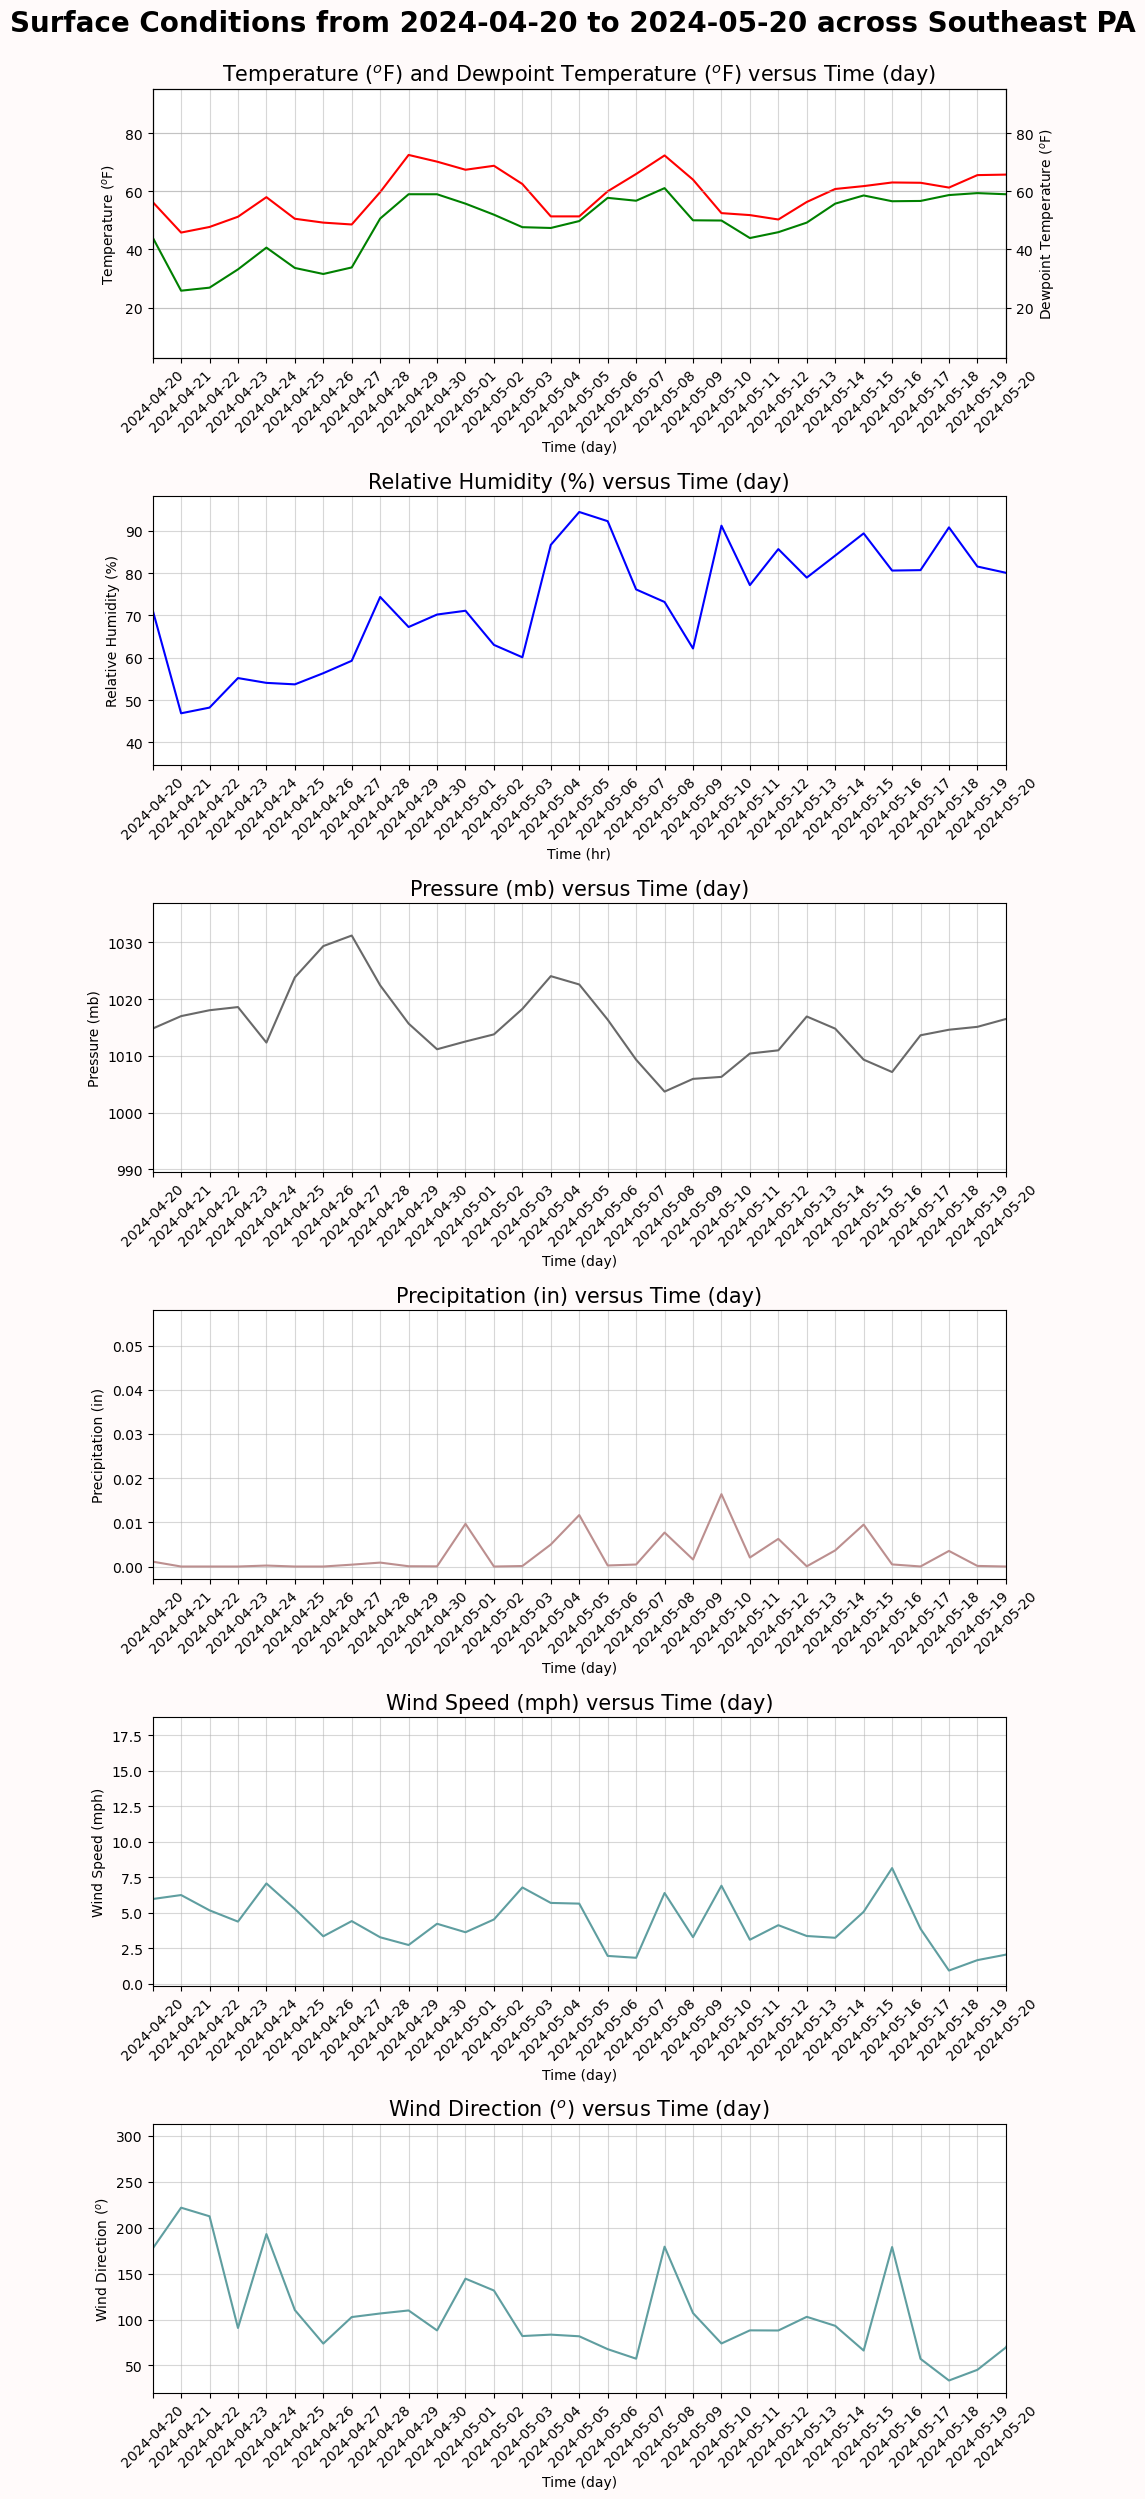

In [10]:
# change valid to be a datetime object in the plot. this is done with the purpose of extracting dates for the x-axis
df_mult2['y-m-d'] = pd.to_datetime(df_mult2['valid']).dt.strftime('%Y-%m-%d')

# plot temp, dewpoint, rh, slp, vis, precip, and wsp in one fig
fig, axs = plt.subplots(ncols = 1, nrows = 6, figsize = (10,25))
fig.set_facecolor('snow')
subplot_titles = ['Temperature ($^{o}$F) and Dewpoint Temperature ($^{o}$F)', 'Relative Humidity (%)', 'Pressure (mb)', 'Precipitation (in)', 'Wind Speed (mph)', 'Wind Direction ($^o$)']
axs = axs.flatten()

# set the range of the xlim for plot
start_date = pd.to_datetime(user_sdate).strftime('%Y-%m-%d')
end_date = pd.to_datetime(user_edate).strftime('%Y-%m-%d')

# start subplot loop
for i in range(0,6): 
    if (i == 0):      
        axs[i].plot(df_mult2['y-m-d'], df_mult2['tmpf'], color='red')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Temperature ($^{o}$F)', fontsize=10)
        axs[i].set_xlabel('Time (day)', fontsize=10)
        axs[i].set_ylim((np.min(df_mult2['tmpf'])-15), (np.max(df_mult2['tmpf'])+10))
        axs[i].grid(True, alpha=0.5)
        # create twin axis to also include dewpoint temperatures
        j = axs[i].twinx()
        j.plot(df_mult2['y-m-d'], df_mult2['dwpf'], color='green')
        j.set_ylabel('Dewpoint Temperature ($^{o}$F)', fontsize=10)
        j.set_ylim((np.min(df_mult2['tmpf'])-15), (np.max(df_mult2['tmpf'])+10))
        j.grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)
    if (i==1):
        axs[i].plot(df_mult2['y-m-d'], df_mult2['relh'], color='blue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Relative Humidity (%)', fontsize=10)
        axs[i].set_xlabel('Time (hr)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)
    if (i==2):
        axs[i].plot(df_mult2['y-m-d'], df_mult2['mslp'], color='dimgray')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Pressure (mb)', fontsize=10)
        axs[i].set_xlabel('Time (day)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)
    if (i==3):
        axs[i].plot(df_mult2['y-m-d'], df_mult2['p01i'], color='rosybrown')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Precipitation (in)', fontsize=10)
        axs[i].set_xlabel('Time (day)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)
    if (i==4):
        axs[i].plot(df_mult2['y-m-d'], df_mult2['sped'], color='cadetblue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Wind Speed (mph)', fontsize=10)
        axs[i].set_xlabel('Time (day)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)
    if (i==5):
        axs[i].plot(df_mult2['y-m-d'], df_mult2['drct'], color='cadetblue')
        axs[i].set_title(subplot_titles[i] + ' versus Time (day)', fontsize=15)
        axs[i].set_ylabel('Wind Direction ($^o$)', fontsize=10)
        axs[i].set_xlabel('Time (day)', fontsize=10)
        axs[i].grid(True, alpha=0.5)
        axs[i].set_xticks(df_mult2['y-m-d'])
        axs[i].set_xlim(start_date, end_date)
        axs[i].set_xticklabels(df_mult2['y-m-d'], rotation=45)

# change the below suptitle line to specify what area is being investigated
fig.suptitle('Surface Conditions from %s to %s across Southeast PA' % (start_date, end_date), fontsize=20, fontweight='bold', y = 0.998)  # create figure title
fig.subplots_adjust(hspace = 0.25)  # increase space between plots
plt.tight_layout()
plt.show()